In [1]:
import os
import pandas as pd

In [2]:
# os.chdir(r"E:\dias 9-10-11 diciembre\PY_OUTLIERS_VP\14- OUTLIERS\TEORIA")
data = pd.read_csv("Ejemplo_3.csv")

In [3]:
# Resumen
resumen = data.describe()

# Gráfico: boxplot para visualizar outliers

<Axes: >

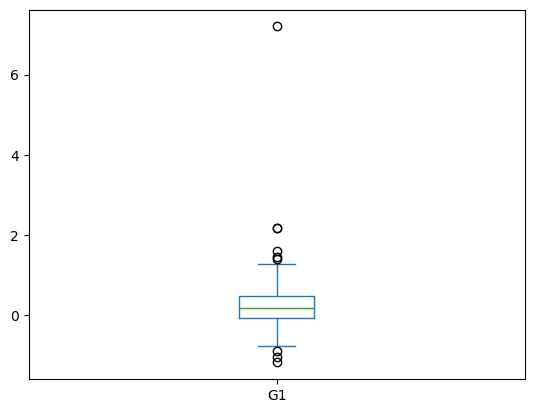

In [4]:
# Gráfico para una variable
var1 = data.iloc[:, 0]
var1.plot(kind = 'box')

<Axes: >

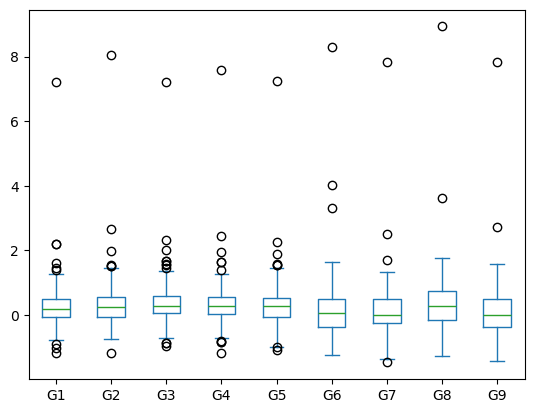

In [5]:
# Gráfico para todas las variables 
data.plot(kind = 'box')

In [6]:
# Una vez que hemos constatado que existen outliers, la primera opción es eliminar las filas que contienen outliers en alguna de las variables:
# Nos quedamos con los datos que tienen un z-score en valor absoluto menor que 3 
# Concepto z-score: número de desviaciones estándar 
import numpy as np
from scipy import stats
dataSinOut = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

<Axes: >

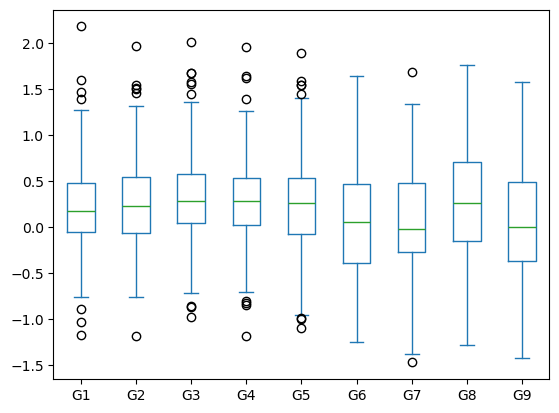

In [7]:
# Graficamos
dataSinOut.plot(kind = 'box')

---

In [8]:
import os
import pandas as pd


In [9]:
# os.chdir(r"E:\dias 9-10-11 diciembre\PY_OUTLIERS_VP\14- OUTLIERS\TEORIA")

In [10]:
data = pd.read_csv("Ejemplo_3.csv")

<Axes: >

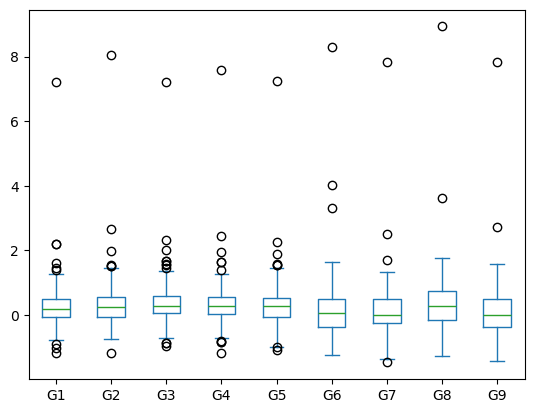

In [11]:
data.plot(kind='box')

<Axes: >

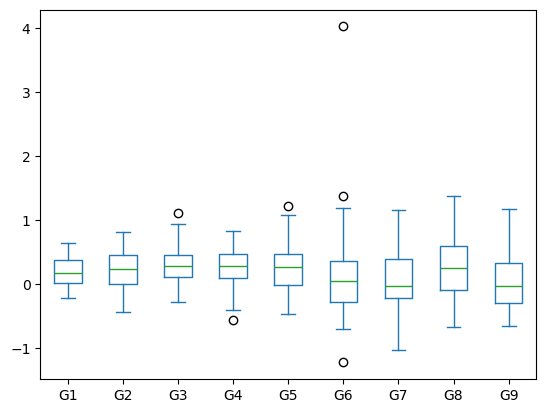

In [12]:
# Otra forma de eliminar los datos es en función de los cuantiles de cada variable.
# Este procedimiento puede ser interesante si estamos interesados en descartar
# algun tipo de evento concreto que se haya focalizado en alguna de las variables.

qA = data["G1"].quantile(0.15)
qA
qB = data["G1"].quantile(0.85)
qB

dataSinOut = data[(data["G1"] > qA) & (data["G1"] < qB)]

dataSinOut.plot(kind='box')

In [13]:
# Observamos que han desaparecido la mayoria de las observaciones.
# Esto puede deberse a que los outliers estén almacenados en las mismas observaciones

In [14]:
# Seleccionamos outliers de la variable G1 
# En este caso tenemos muchos outliers.
dataOut = data[(data["G1"] < qA) | (data["G1"] > qB)]

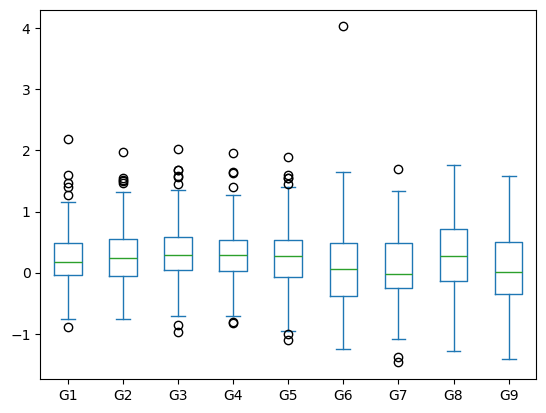

In [15]:
# Realmente estamos más interesado en saber que ocurre con los valores verdaderamente extremos.
# Por ello ajustamos más los porcentajes para seleccionar aquellos valores en los que estamos interesados.

qA = data["G1"].quantile(0.01)
qB = data["G1"].quantile(0.99)

dataSinOut = data[(data["G1"] > qA) & (data["G1"] < qB)]
dataSinOut.plot(kind='box')
dataOut = data[(data["G1"] < qA) | (data["G1"] > qB)]

In [16]:
# Podemos observar en la tabla de los outliers que la observacion 38 agrupa valores muy extremos y que realmente resultan muy anómalos.
# Una observacioón asi puede distorisionar un modelo, por ello sería adecuado estudiar dicha variable por separado y excluirla del modelo.

In [17]:
# Por otro lado, en el gráfico anterior observamos que en la variable "G6" exite un outlier realmente extremo.
# De cara a entender bien nuestros datos es conveniente saber qué ocurre con esa observación.

In [18]:
# Por ello repetimos el proceso con la variable G6.

qA6 = data["G6"].quantile(0.01)
qB6 = data["G6"].quantile(0.99)
dataOut6 = data[(data["G6"] < qA6) | (data["G6"] > qB6)]
dataOut6

,G1,G2,G3,G4,G5,G6,G7,G8,G9
38,7.197,8.060,7.223,7.589,7.258,8.310,7.835,8.931,7.824
56,-0.762,-0.686,-0.863,-0.826,-0.824,-1.252,-1.470,-1.283,-0.992
145,0.002,-0.083,0.300,-0.097,0.396,-1.225,0.331,0.368,0.150
154,-0.107,-0.093,0.065,0.114,-0.072,4.029,-0.055,-0.062,-0.454


In [19]:
# En este análisis vemos que en la observación que nos acontece el resto de las variables toman valore que podemos calificar como normales

---


In [20]:
import os
import pandas as pd

In [21]:
# os.chdir(r"E:\dias 9-10-11 diciembre\PY_OUTLIERS_VP\14- OUTLIERS\TEORIA")

In [22]:
data = pd.read_csv("Ejemplo_3.csv")

In [23]:
# Hacemos lo mismo que al principio pero teniendo solo en cuenta la variable G1 (por ejemplo)
# Imaginemos que la variable G1 es la que nos interesa, la variable objetivo.
from scipy import stats
data2 = data[(np.abs(stats.zscore(data["G1"])) < 3)]

---

In [24]:
import os
import pandas as pd

In [25]:
# os.chdir(r"E:\dias 9-10-11 diciembre\PY_OUTLIERS_VP\14- OUTLIERS\TEORIA")

In [26]:
data = pd.read_csv("Ejemplo_3.csv")

In [27]:
# En los pasos anteriores hemos concluido que la fila 38 presenta unos valores muy extremos.
# Por ello, eliminamos la observación 38.
data1 = data.drop(data.index[38])

---

In [28]:
import os
import pandas as pd

In [29]:
# os.chdir(r"E:\dias 9-10-11 diciembre\PY_OUTLIERS_VP\14- OUTLIERS\TEORIA")

In [30]:
data = pd.read_csv("Ejemplo_3.csv")

In [31]:
# Otra opción es seleccionar una de las variables y establecer un límite porque conocemos los datos
# Vuelvo a cargar los datos.

data2 = data[(data["G1"] < 5)]

---

In [32]:
import os
import pandas as pd

In [33]:
# os.chdir(r"E:\dias 9-10-11 diciembre\PY_OUTLIERS_VP\14- OUTLIERS\TEORIA")

In [34]:
data = pd.read_csv("Ejemplo_3.csv")

In [35]:
# Otra opción es eliminar aquellas observaciones que sobrepasen una desviación prefijada.

# Esto se puede aplicar sobre una de las variables o sobre todo el dataset.

# Aplicarlo sobre una determinada variable nos exige ser cuidadosos a la hora de fijar el limite para no eliminar demasiadas observaciones.

from scipy import stats
data1 = data[(np.abs(stats.zscore(data["G1"])) < 6)]
data2 = data[(np.abs(stats.zscore(data["G1"])) < 1)]

---

In [36]:
import os
import pandas as pd

In [37]:
# os.chdir(r"E:\dias 9-10-11 diciembre\PY_OUTLIERS_VP\14- OUTLIERS\TEORIA")

In [38]:
data = pd.read_csv("Ejemplo_3.csv")

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Creamos tres funciones: cada una nos calcula las observaciones que considera outliers para cada variable 

In [40]:
# 1. Marca como outliers aquellas observaciones que difieran de la media más de tres veces la desviación típica.
def outliers_z_score(ys):
    c_desv_st = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > c_desv_st)

datos = data.apply(outliers_z_score)

In [41]:
# 2. Mediana
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

datos = data.apply(outliers_modified_z_score)

In [42]:
# 3. El cálculo se basa en la diferencia para el percentil 25 y 75.
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

datos = data.apply(outliers_iqr)

---

In [43]:
import os
import pandas as pd

In [44]:
# os.chdir(r"E:\dias 9-10-11 diciembre\PY_OUTLIERS_VP\14- OUTLIERS\TEORIA")

In [45]:
data = pd.read_csv("Ejemplo_3.csv")

In [46]:
# Hasta ahora hemos visto cómo identificar los outliers mediante diferentes métodos 
# A continuación mostramos cómo sustituirlos (por ejemplo por la media)

def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = mean        
    return group

datos = data.apply(replace)

---

In [47]:
import os
import pandas as pd

In [48]:
# os.chdir(r"E:\dias 9-10-11 diciembre\PY_OUTLIERS_VP\14- OUTLIERS\TEORIA")

In [49]:
data = pd.read_csv("Ejemplo_3.csv")

In [50]:
# De esta manera podemos convertir los outliers en NAs y luego tratarlos como NAs.

import numpy as np

def replace2(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = np.nan        
    return group

datos = data.apply(replace2)

In [51]:
# Comprobamos que existen valores perdidos
datos.isnull().any().any()

True

---
#### En estos procedimientos hemos visto diferentes formas de eliminar los valores extremos.
#### Existen otras muchas ocasiones en las que estos valores juegan un papel clave para el modelo.
#### De hecho en algunos casos son mas importantes los valores extremos que los valores "normales".
#### En estas ocasiones nos interesa crear una nueva variable que nos marque si una determinada observacion es un outlier o no.
#### Ademas en estos casos nos puede interesar diferenciar si se trata de un outlier "por arriba" o "por abajo".
---

In [52]:
import os
import pandas as pd

In [54]:
# os.chdir(r"E:\dias 9-10-11 diciembre\PY_OUTLIERS_VP\14- OUTLIERS\TEORIA")

In [55]:
data = pd.read_csv("Ejemplo_3.csv")

#### Para cada variable original vamos a crear una variable 'outlier alto' y otra 'outlier bajo' 

In [56]:
# Variable G1:
q1A = data["G1"].quantile(0.15)
q1B = data["G1"].quantile(0.85)

data.loc[:,"out1bajo"] = 0
data.loc[data["G1"] < q1A, "out1bajo"] = 1

data.loc[:,"out1alto"] = 0
data.loc[data["G1"] > q1B,"out1alto"] = 1

In [57]:
# Variable G2:
q2A = data["G2"].quantile(0.15)
q2B = data["G2"].quantile(0.85)

data.loc[:,"out2bajo"] = 0
data.loc[data["G2"] < q2A,"out1bajo"] = 1

data.loc[:,"out2alto"] = 0
data.loc[data["G2"] > q2B,"out2alto"] = 1

##### De esta forma vemos si debido a los valores extremos se produce un "salto" en el valor.

In [58]:
# También puede ocurrir que en estos valores se produzca un cambio en la pendiente.
# Para incluir esto hay que incluir una variable multicativa para cada caso:

data["out1bajomulti"] = data["G1"]*data["out1bajo"]
data["out1altomulti"] = data["G1"]*data["out1alto"]
data["out2bajomulti"] = data["G2"]*data["out2bajo"]
data["out2altomulti"] = data["G2"]*data["out2alto"]